## Waste Managment Using CNN Model

In [5]:
pip install opencv.python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# pip install tensorflow

In [7]:
# import necessary libraies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [8]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

In [9]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from glob import glob 


In [10]:
# Visualization
from glob import glob

x_data = []
y_data = []
for category in glob(train_path+ '/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
        data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [03:12<00:00, 51.90it/s]


In [11]:
data.shape


(22564, 2)

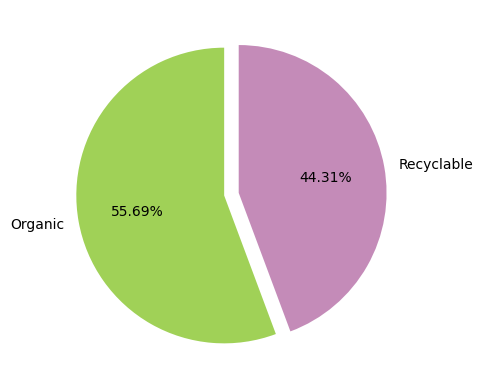

In [12]:
import matplotlib.pyplot as plt


colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors = colors, startangle = 90,  explode=[0.05, 0.05])
plt.show()

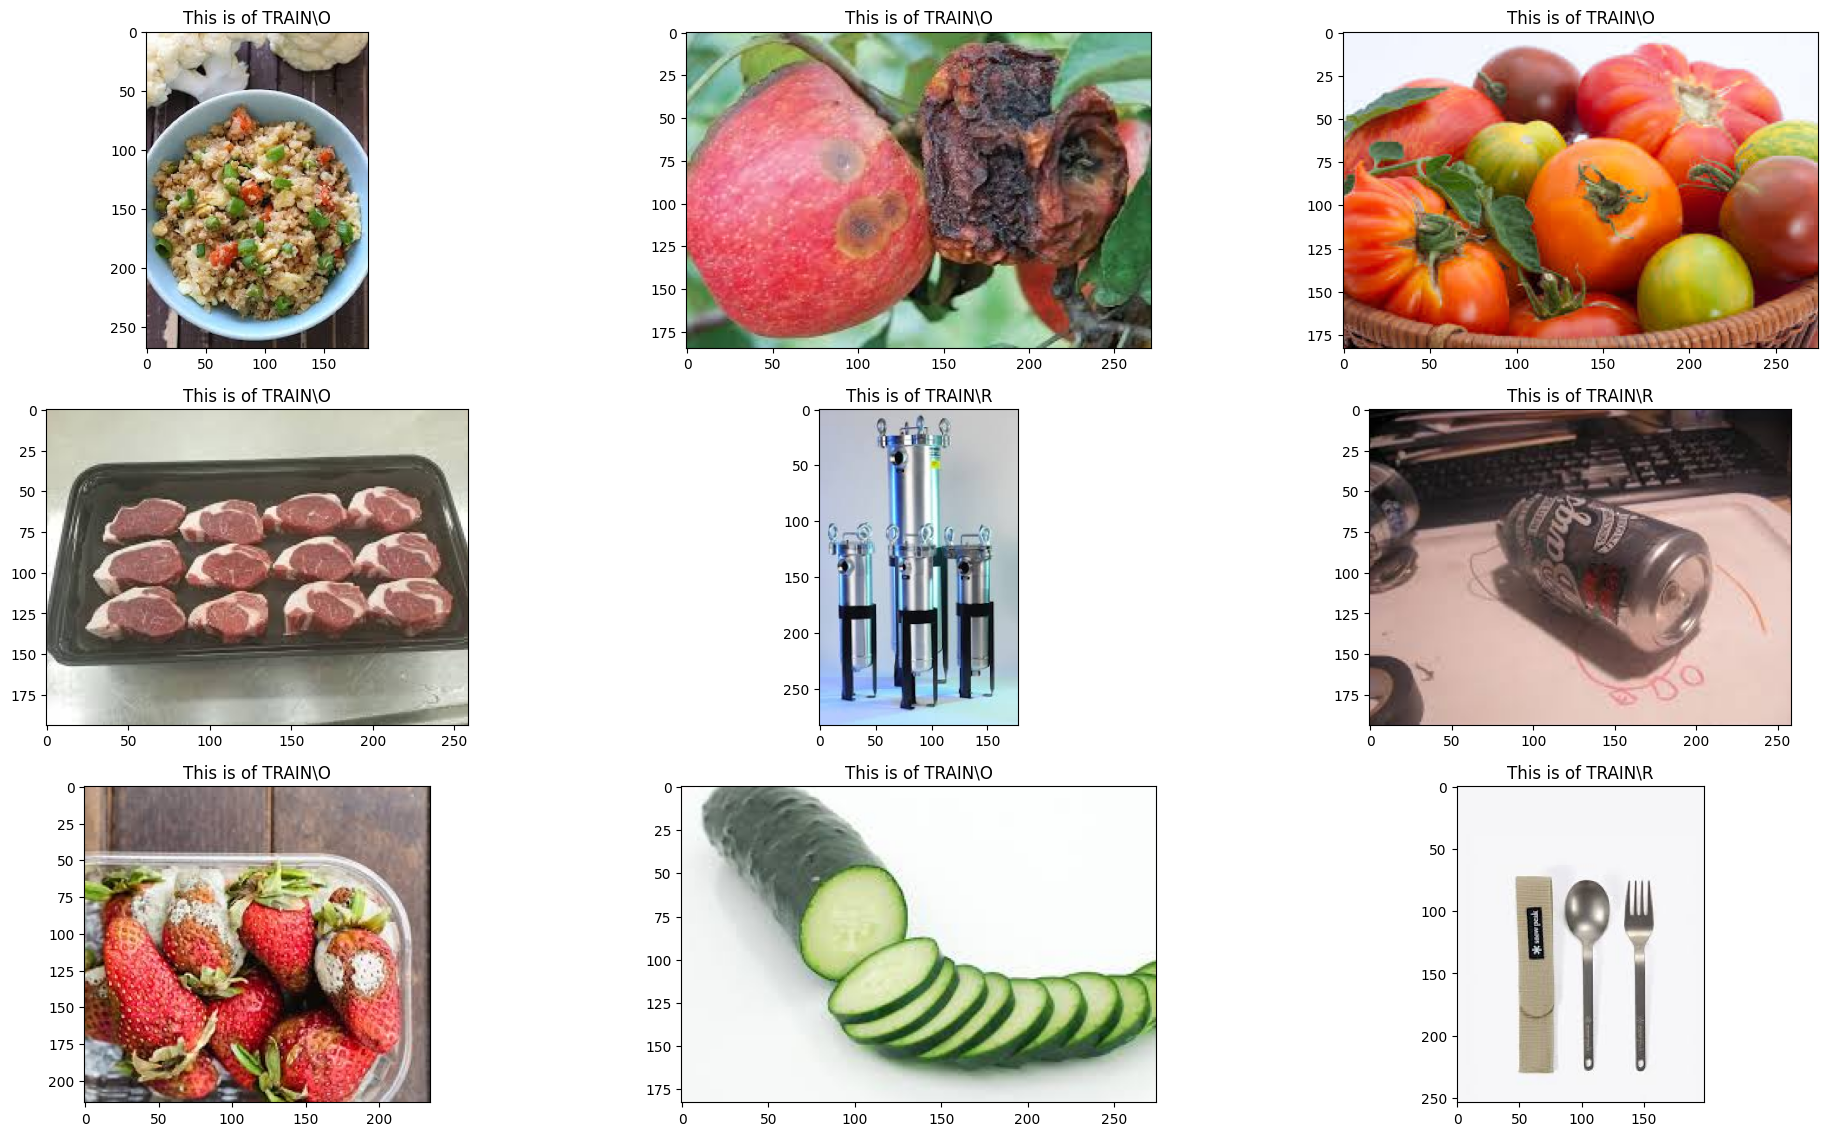

In [13]:

plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i % 12) + 1)
    index = np.random.randint(len(data))
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolutional Neural Network

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

# Model Configuration
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 2  # Assuming binary classification

# Create Model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), padding='same', input_shape=INPUT_SHAPE))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(NUM_CLASSES))
model.add(Activation('sigmoid'))

# Compile Model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Training parameters
batch_size = 64

In [15]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 25,802,370 (98.43 MB)

 Trainable params: 25,801,282 (98.42 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [16]:

train_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:

test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [19]:

hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)

Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 1408s 4s/step - accuracy: 0.7946 - loss: 0.4834 - val_accuracy: 0.6848 - val_loss: 0.5663
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 1418s 4s/step - accuracy: 0.8474 - loss: 0.3686 - val_accuracy: 0.7525 - val_loss: 0.6411
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 1404s 4s/step - accuracy: 0.8665 - loss: 0.3333 - val_accuracy: 0.7652 - val_loss: 0.5307
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 1405s 4s/step - accuracy: 0.8764 - loss: 0.3113 - val_accuracy: 0.6860 - val_loss: 0.7652
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 1394s 4s/step - accuracy: 0.8837 - loss: 0.2907 - val_accuracy: 0.6848 - val_loss: 0.7647
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 1382s 4s/step - accuracy: 0.8904 - loss: 0.2699 - val_accuracy: 0.8528 - val_loss: 0.3835
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 1407s 4s/step - accuracy: 0.9050 - loss: 0.2452 - val_accuracy: 0.8854 - val_loss: 0.3242
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 1363s 4s/step - accuracy: 0.9100 - loss: 0.2275 - 

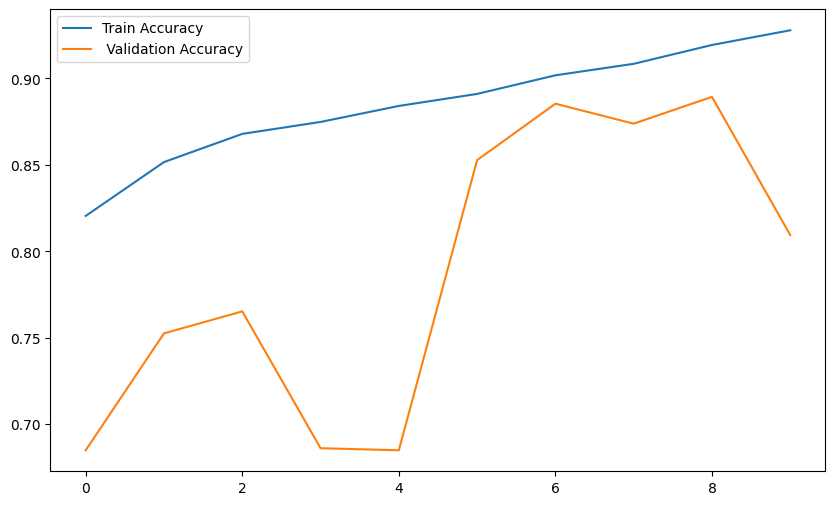

In [20]:

plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label=' Validation Accuracy')
plt.legend()
plt.show()

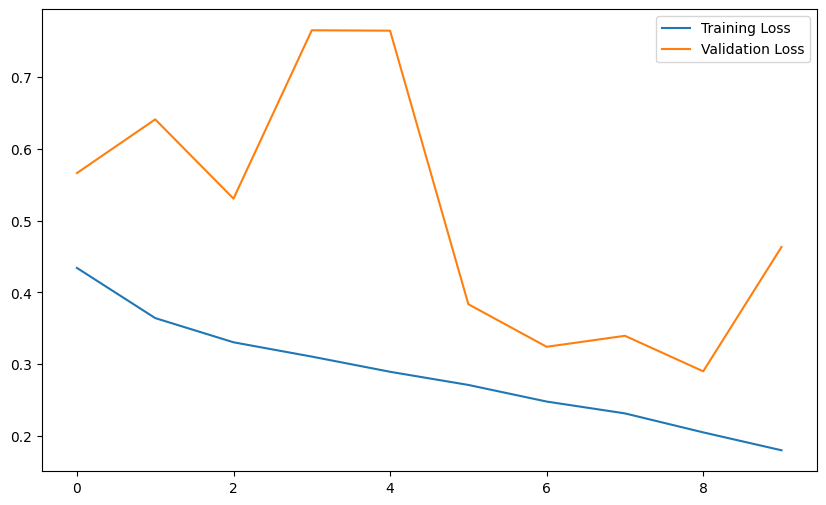

In [21]:

plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [22]:

def predict_fun(img):
  plt.figure(figsize=(6, 4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print('The image shown is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
The image shown is Recyclable Waste


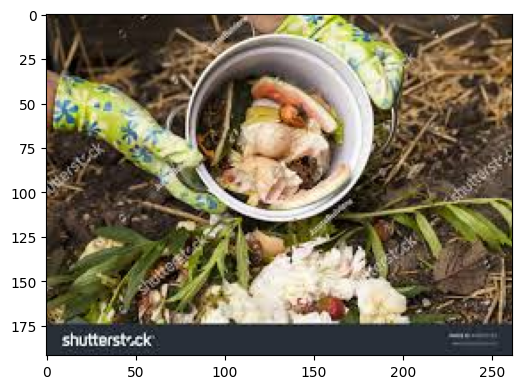

In [30]:
test_img = cv2.imread('dataset/TEST/O/O_13911.jpg')
if test_img is not None:
	predict_fun(test_img)
else:
	print("Error: Image not found or path is incorrect")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
The image shown is Recyclable Waste


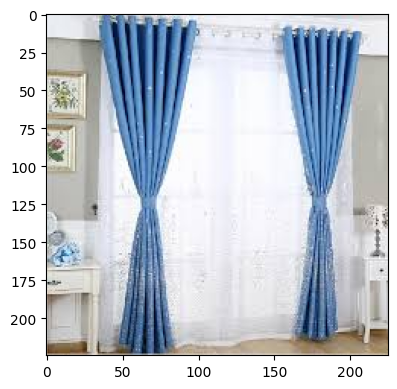

In [27]:
test_img = cv2.imread('dataset/TEST/R/R_10001.jpg')
if test_img is not None:
	predict_fun(test_img)
else:
	print("Error: Image not found or path is incorrect")